In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind
from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.xls')

In [3]:
display(cacao.head(10))
cacao.info()
cacao.describe()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


,Bar id,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,898.000000,1035.904735,2012.325348,3.422981
std,518.316184,552.886365,2.927210,1.750584
min,1.000000,5.000000,2006.000000,1.000000
25%,449.500000,576.000000,2010.000000,3.000000
50%,898.000000,1069.000000,2013.000000,3.250000
75%,1346.500000,1502.000000,2015.000000,3.500000
max,1795.000000,1952.000000,2017.000000,19.750000


In [5]:
cacao.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']
cacao.columns

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

In [6]:
for h in cacao.columns:
    print('SORTED BY >>>>>>>>>>>>>>>> ' + h)
    if cacao[h].dtype == 'object':
        display(cacao[h].value_counts())
        display(cacao.sort_values(h, ascending=False).head(10))
        display(cacao.sort_values(h, ascending=True).head(10))
        print(5*'\n')

SORTED BY >>>>>>>>>>>>>>>> bar_id
SORTED BY >>>>>>>>>>>>>>>> company


                   99
Soma               45
Fresco             26
Bonnat             26
Pralus             25
                   ..
Dole (Guittard)     1
Indah               1
Kiskadee            1
Park 75             1
Metropolitan        1
Name: company, Length: 408, dtype: int64

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
536,537,,Tien Giang,1864,2016,78%,U.S.A.,3.50,Trinitario,Vietnam
965,966,,Kokoa Kamili,1566,2015,70%,U.S.A.,3.50,,Tanzania
1506,1507,,Wasatch,1161,2013,70%,U.S.A.,3.50,Blend,
1497,1498,,"Maranon, Fortunato No. 4",1840,2016,68%,U.K.,2.75,Forastero (Nacional),Peru
1490,1491,,,1666,2015,67%,Australia,3.00,Forastero (Nacional),Peru
1464,1465,,Kokoa Kamili Coop,1856,2016,73%,Canada,3.50,,Tanzania
78,79,,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
1721,1722,,"Los Rios, Rancho Grande 2004/2007",153,2007,90%,U.S.A.,2.00,Forastero (Arriba),Ecuador
1451,1452,,"Belize, 2013",1335,2014,72%,U.S.A.,3.25,"Criollo, Trinitario",Belize
1446,1447,,Jamaica,1450,2015,72%,U.S.A.,3.25,Trinitario,Jamaica


,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
22,23,A. Morin,Peru,797,2012,63%,France,3.75,,Peru
21,22,A. Morin,Bolivia,797,2012,70%,France,3.50,,Bolivia
20,21,A. Morin,Chanchamayo Province,1019,2013,63%,France,4.00,,Peru
19,20,A. Morin,Chanchamayo Province,1019,2013,70%,France,3.50,,Peru
18,19,A. Morin,Piura,1019,2013,70%,France,3.25,,Peru
17,18,A. Morin,Chuao,1015,2013,70%,France,4.00,Trinitario,Venezuela
15,16,A. Morin,Birmanie,1015,2013,70%,France,3.00,,Burma
14,15,A. Morin,Colombie,1015,2013,70%,France,2.75,,Colombia
13,14,A. Morin,Equateur,1011,2013,70%,France,3.75,,Ecuador








SORTED BY >>>>>>>>>>>>>>>> specific_origin


                                   58
Madagascar                         55
Peru                               44
Ecuador                            39
Dominican Republic                 33
                                   ..
Mangaro P.                          1
Brooklyn Blend                      1
Alto Beni, Upper Rio Beni, 2015     1
Somia Plantation, Akesson, 2012     1
San Martin, Amazonian Highlands     1
Name: specific_origin, Length: 1013, dtype: int64

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1490,1491,,,1666,2015,67%,Australia,3.00,Forastero (Nacional),Peru
1189,1190,Noir d' Ebine,,841,2012,70%,U.S.A.,3.00,,Ecuador
929,930,La Chocolaterie Nanairo,,1892,2016,70%,Japan,3.00,"Trinitario, Criollo",Belize
478,479,Damson,,1610,2015,70%,U.K.,3.00,Trinitario,Trinidad
585,586,Duffy's,,623,2011,72%,U.K.,3.75,Criollo,Honduras
1728,1729,Violet Sky,,1502,2015,77%,U.S.A.,2.75,Trinitario,Guatemala
1312,1313,Potomac,,789,2011,70%,U.S.A.,3.50,,Brazil
94,95,Animas,,1852,2016,75%,U.S.A.,12.50,,Bolivia
589,590,Duffy's,,765,2011,71%,U.K.,3.50,,Venezuela
294,295,Cacao de Origen,,1395,2014,70%,Venezuela,11.50,Trinitario,Venezuela


,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
473,474,Creo,"""heirloom"", Arriba Nacional",1736,2016,85%,U.S.A.,3.25,Forastero (Nacional),Ecuador
474,475,Creo,"""heirloom"", Arriba Nacional",1736,2016,73%,U.S.A.,3.75,Forastero (Nacional),Ecuador
1411,1412,S.A.I.D.,100 percent,615,2010,100%,Italy,1.50,,
197,198,,2009 Hapa Nibby,502,2010,70%,U.S.A.,3.75,Blend,"Dominican Rep., Bali"
1040,1041,Map Chocolate,"A case of the Xerces Blues, triple roast",1606,2015,70%,U.S.A.,3.50,,Nicaragua
729,730,Georgia Ramon,ABOCFA Coop,1642,2015,70%,Germany,4.00,Forastero,Ghana
1695,1696,Valrhona,Abinao,153,2007,85%,France,2.50,Forastero,West Africa
1510,1511,,"Abstract S. w/ Jamaica nibs,batch abs60323.0",1828,2016,75%,Canada,3.75,,"Ven.,Ecu.,Peru,Nic."
932,933,,"Acarigua, w/ nibs",1189,2013,56%,France,3.25,,Ecuador
45,46,Altus aka Cao Artisan,Acopagro,1728,2016,60%,U.S.A.,3.00,,Peru








SORTED BY >>>>>>>>>>>>>>>> ref
SORTED BY >>>>>>>>>>>>>>>> review_date
SORTED BY >>>>>>>>>>>>>>>> cocoa_percent


70%     664
75%     219
72%     189
65%      77
80%      70
       ... 
668%      1
46%       1
87%       1
582%      1
265%      1
Name: cocoa_percent, Length: 59, dtype: int64

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1623,1624,TCHO,Peru- Ecuador,915,2012,99%,U.S.A.,3.25,,"Peru, Ecuador"
1120,1121,Michel Cluizel,Noir Infini,81,2006,99%,France,2.00,,
759,760,,Nocturne,387,2009,91%,U.S.A.,3.00,,
324,325,Cacaoyere (Ecuatoriana),,259,2008,91%,Ecuador,1.50,Forastero (Arriba),Ecuador
1658,1659,Theo,,188,2007,91%,U.S.A.,2.00,Blend,Venezuela
831,832,Hotel Chocolat (Coppeneur),"Los Rios, H. Iara",1065,2013,90%,U.K.,3.00,Forastero (Nacional),Ecuador
1716,1717,,Dark,1117,2013,90%,U.S.A.,3.75,,Central and S. America
392,393,Chocolate Alchemist-Philly,"Tumbes, ""Zarumilla""",1772,2016,90%,U.S.A.,2.50,,Peru
906,907,Kto,Belize,1426,2014,90%,U.S.A.,3.25,Trinitario,Belize
1713,1714,Videri,Dominican Republic,1211,2014,90%,U.S.A.,3.25,,Dominican Republic


,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
249,250,Bouga Cacao (Tulicorp),"El Oro, Hacienda de Oro",341,2009,100%,Ecuador,1.50,Forastero (Arriba),Ecuador
1251,1252,Pacari,Raw,266,2008,100%,Ecuador,2.00,Forastero (Arriba),Ecuador
1319,1320,Pralus,"Sambirano Valley, Le 100%",202,2008,100%,France,3.00,Criollo,Madagascar
1411,1412,S.A.I.D.,100 percent,615,2010,100%,Italy,1.50,,
245,246,Bonnat,One Hundred,81,2006,100%,France,1.50,,
1204,1205,,Sang Yum Coop,1760,2016,100%,New Zealand,2.75,,Samoa
1466,1467,Sirene,"Somia Plantation, 2012",1502,2015,100%,Canada,3.00,Trinitario,Madagascar
1467,1468,Sirene,"Camino Verde P., Balao, Guayas, 2012",1506,2015,100%,Canada,3.00,,Ecuador
779,780,Habitual,one hundred,1205,2014,100%,Canada,2.00,,
557,558,Domori,"IL100, H. San Jose",1109,2013,100%,Italy,3.00,Criollo,Venezuela








SORTED BY >>>>>>>>>>>>>>>> company_location


U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
              ... 
Russia           1
Philippines      1
Ghana            1
Suriname         1
Eucador          1
Name: company_location, Length: 60, dtype: int64

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
156,157,Baravelli's,single estate,955,2012,80%,Wales,2.75,,Costa Rica
1058,1059,Marou,Lam Dong,955,2012,74%,Vietnam,3.50,Trinitario,Vietnam
1049,1050,Marou,"Tan Phu Dong Island, Heart of Darkness",1650,2015,85%,Vietnam,3.25,Trinitario,Vietnam
1050,1051,Marou,Ben Tre,1650,2015,68%,Vietnam,3.50,Trinitario,Vietnam
1051,1052,Marou,,1650,2015,70%,Vietnam,3.75,Trinitario,Vietnam
1052,1053,Marou,"Tan Phu Dong, Treasure Island",1149,2013,75%,Vietnam,3.50,Trinitario,Vietnam
1053,1054,Marou,Ba Ria,845,2012,76%,Vietnam,3.50,Trinitario,Vietnam
738,739,Grand Place,"Ben Tre, Dong Nai",741,2011,72%,Vietnam,3.00,Trinitario,Vietnam
1054,1055,Marou,Dong Nai,845,2012,72%,Vietnam,3.50,Trinitario,Vietnam
1055,1056,Marou,"Tien Giang, Gao Co-op",845,2012,70%,Vietnam,3.50,Trinitario,Vietnam


,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
402,403,Chocolate Makers,Tres Hombres,1530,2015,75%,Amsterdam,3.25,Trinitario,Dominican Republic
403,404,Chocolate Makers,"Congo, Gorilla bar",1530,2015,68%,Amsterdam,3.50,Forastero,Congo
404,405,Chocolate Makers,"Peru, Awagum bar",1530,2015,80%,Amsterdam,3.75,Criollo,Peru
1110,1111,Metropolitan,South America,1688,2015,70%,Amsterdam,3.50,Trinitario,South America
1417,1418,Salgado,Bahia Superior,288,2008,70%,Argentina,3.50,Forastero,Brazil
1418,1419,,Esmeraldas,288,2008,70%,Argentina,3.50,Forastero (Nacional),Ecuador
440,441,Compania de Chocolate (Salgado),Sur del Lago,579,2010,70%,Argentina,3.25,,Venezuela
441,442,Compania de Chocolate (Salgado),Carenero Superior,292,2008,80%,Argentina,2.75,Trinitario,Venezuela
443,444,Compania de Chocolate (Salgado),Ocumare,292,2008,70%,Argentina,3.75,Criollo,Venezuela
442,443,Compania de Chocolate (Salgado),Moxos,292,2008,72%,Argentina,3.25,,Bolivia








SORTED BY >>>>>>>>>>>>>>>> rating
SORTED BY >>>>>>>>>>>>>>>> bean_type


                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Matina                        3
Beniano                       3
Nacional (Arriba)             3
Nacional                      2
Criollo (Amarru)              2
Forastero (Catongo)           2
Amazon mix                    2
Trinitario (85% Criollo)      2
Trinitario, Forastero         2
Criollo, Forastero            2
Amazon, ICS                   2
Criollo (Ocumare 61)          2
Forastero (Amelonado)         1
Forastero(Arriba, CCN)        1
Trinitario (Scavina)          1
Criollo (Ocumare)             1
Trinitario, TCGA              1
Trinitario, Nacional          1
Foraster

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
999,1000,Madre,"Hamakua Coast, Kokoleka",991,2012,70%,U.S.A.,3.25,,Hawaii
997,998,Madre,"Choobua, Kona",1089,2013,70%,U.S.A.,15.75,,Hawaii
996,997,Madre,Brazil,1085,2013,70%,U.S.A.,3.50,,Brazil
995,996,Madre,Puerto Rico,1085,2013,70%,U.S.A.,2.75,,Puerto Rico
994,995,Madre,Guadalcanal,1940,2017,73%,U.S.A.,3.50,,Solomon Islands
989,990,Machu Picchu Trading Co.,Peru,552,2010,55%,Peru,10.50,,Peru
988,989,Machu Picchu Trading Co.,Peru,721,2011,70%,Peru,1.50,,Peru
987,988,Luker,Santander,552,2010,65%,Colombia,3.50,,Colombia
986,987,Luker,Misterio,552,2010,58%,Colombia,3.00,,"Colombia, Ecuador"


,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
789,790,Heirloom Cacao Preservation (Brasstown),"Maya Mtn, Moho R., Toledo D., 2015",1748,2016,70%,U.S.A.,3.25,Amazon,Belize
790,791,Heirloom Cacao Preservation (Fruition),"Cota Brus, Terciopelo, 2015",1748,2016,74%,U.S.A.,3.50,Amazon mix,Costa Rica
719,720,Fruition,"Coto Brus, Heirloom, Batch 1",1780,2016,74%,U.S.A.,4.00,Amazon mix,Costa Rica
798,799,Heirloom Cacao Preservation (Zokoko),"Alto Beni, Upper Rio Beni, 2015",1744,2016,68%,U.S.A.,3.75,"Amazon, ICS",Bolivia
791,792,Heirloom Cacao Preservation (Guittard),"Alto Beni, Upper Rio Beni, 2014",1239,2014,67%,U.S.A.,3.50,"Amazon, ICS",Bolivia
799,800,Heirloom Cacao Preservation (Zokoko),"Wild Beni, Lower Rio Beni, Tranquilidad, 2015",1744,2016,72%,U.S.A.,4.00,Beniano,Bolivia
792,793,Heirloom Cacao Preservation (Guittard),"Wild Beni, Lower Rio Beni, Tranquilidad, 2014",1243,2014,67%,U.S.A.,3.00,Beniano,Bolivia
718,719,Fruition,"Wild Bolivian, Batch 2",1780,2016,74%,U.S.A.,3.75,Beniano,Bolivia
148,149,Bahen & Co.,,999,2012,70%,Australia,2.50,Blend,
1374,1375,Ritual,"Mid Mountain, 2014",1466,2015,70%,U.S.A.,3.50,Blend,








SORTED BY >>>>>>>>>>>>>>>> broad_origin


Venezuela                       214
Ecuador                         193
Peru                            165
Madagascar                      145
Dominican Republic              141
                               ... 
Guat., D.R., Peru, Mad., PNG      1
Ecuador, Mad., PNG                1
Ven, Trinidad, Ecuador            1
Nigeria                           1
Africa, Carribean, C. Am.         1
Name: broad_origin, Length: 100, dtype: int64

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
897,898,Kaoka (Cemoi),Noir,404,2009,70%,France,2.75,,
416,417,Chocovic,Kendari,439,2009,60%,Spain,3.25,,
393,394,Chocolate Alchemist-Philly,"Philly Blend, 5 plantations",1772,2016,80%,U.S.A.,2.50,,
1129,1130,Middlebury,Houseblend,887,2012,65%,U.S.A.,1.50,,
1175,1176,Neuhaus (Callebaut),Dark,135,2007,73%,Belgium,1.00,,
182,183,Bernachon,Nature,797,2012,55%,France,2.75,,
755,756,Guittard,Lever du Soleil,654,2011,61%,U.S.A.,3.25,,
1272,1273,Patric,Signature Blend,636,2011,70%,U.S.A.,3.75,Blend,
565,566,Domori,Ilblend,272,2008,70%,Italy,3.75,Blend,
564,565,Domori,Blend No. 1,272,2008,78%,Italy,3.50,Blend,


,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
930,931,La Maison du Chocolat (Valrhona),"Cuana, 2013",1121,2013,74%,France,2.75,,"Africa, Carribean, C. Am."
475,476,Daintree,Goodman Estate,1654,2015,70%,Australia,2.75,,Australia
476,477,Daintree,"Daintree Estates, N. Queensland",785,2011,70%,Australia,3.25,,Australia
1481,1482,"Smooth Chocolator, The",Australia,1864,2016,67%,Australia,3.75,,Australia
904,905,Kto,Belize,1422,2014,72%,U.S.A.,3.00,Trinitario,Belize
194,195,Bisou,Belize,1486,2015,86%,U.S.A.,3.25,Trinitario,Belize
383,384,Choco Del Sol,Maya Mountain w/ nibs,1407,2014,75%,Germany,3.00,Trinitario,Belize
880,881,Just Good Chocolate,Belize,1375,2014,70%,U.S.A.,3.50,Trinitario,Belize
384,385,Choco Del Sol,Maya Mountain,1407,2014,82%,Germany,3.25,Trinitario,Belize
250,251,Bowler Man,Maya Mountain,1267,2014,70%,U.S.A.,2.75,Trinitario,Belize


In [7]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

In [7]:
cacao.company.value_counts()  # на первом месте стоит пустая, её не считаем
# cacao.company.nunique()

                       99
Soma                   45
Bonnat                 26
Fresco                 26
Pralus                 25
                       ..
Chocolats Privilege     1
La Oroquidea            1
Green Bean to Bar       1
Dole (Guittard)         1
Pura Delizia            1
Name: company, Length: 408, dtype: int64

In [9]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [10]:
cacao.company.value_counts()

Soma                                   45
Bonnat                                 26
Fresco                                 26
Pralus                                 25
Domori                                 22
                                       ..
Monsieur Truffe                         1
Chocolate Conspiracy                    1
Indaphoria                              1
Heirloom Cacao Preservation (Mindo)     1
Amazona                                 1
Name: company, Length: 407, dtype: int64

In [11]:
# Попробуем отфильтровать лишние данные и выведем только те компании, у которых в рейтинге больше 10 продуктов.
(cacao.company.value_counts()>10).sum(), (cacao.company.value_counts()==1).sum()

(30, 122)

In [12]:
cacao.specific_origin.value_counts()

                                   58
Madagascar                         55
Peru                               44
Ecuador                            39
Dominican Republic                 33
                                   ..
Mangaro P.                          1
Brooklyn Blend                      1
Alto Beni, Upper Rio Beni, 2015     1
Somia Plantation, Akesson, 2012     1
San Martin, Amazonian Highlands     1
Name: specific_origin, Length: 1013, dtype: int64

In [13]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)

In [14]:
cacao.specific_origin.value_counts()

Madagascar                      55
Peru                            44
Ecuador                         39
Dominican Republic              33
Venezuela                       21
                                ..
Finisterra                       1
Porcelana, Pariguan              1
Midnight                         1
Bolivia, Wild Thing              1
Dominican Republic, Batch D2     1
Name: specific_origin, Length: 1012, dtype: int64

In [15]:
(cacao.specific_origin.value_counts()>10).sum()

15

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

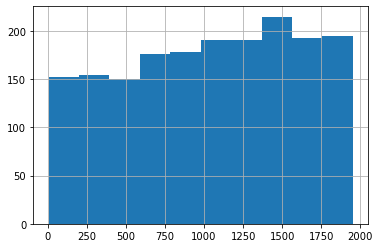

In [16]:
cacao.ref.hist()
cacao.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

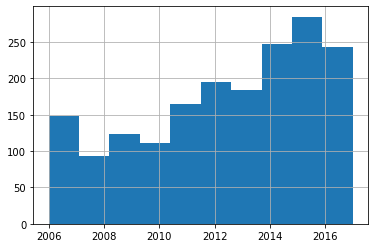

In [17]:
cacao.review_date.hist()
cacao.review_date.describe()

In [18]:
cacao.cocoa_percent
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

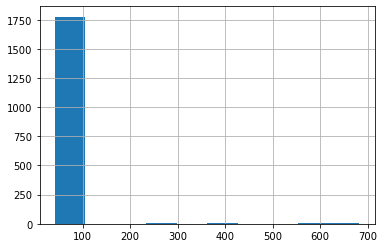

In [19]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


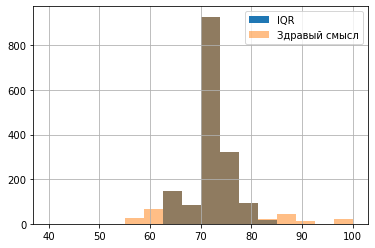

In [20]:
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)

print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(40,100), label='IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent<=100].hist(bins=16, range=(40,100), label='Здравый смысл', alpha=0.5)

plt.legend();

In [21]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [22]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Russia,1
Philippines,1
Ghana,1
Suriname,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

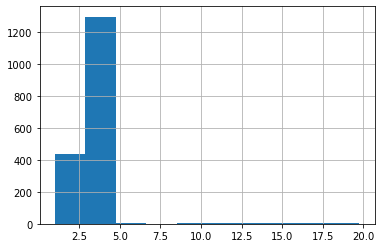

In [23]:
cacao.rating.hist()
cacao.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


<AxesSubplot:>

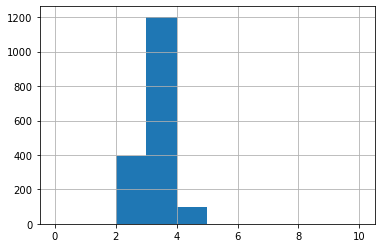

In [24]:
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)

print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

cacao.rating.loc[cacao.rating.between(perc25-1.5*IQR, perc75+1.5*IQR)].hist(bins=10, range=(0,10), label='IQR')

In [25]:
cacao = cacao.loc[cacao.rating.between(perc25-1.5*IQR, perc75+1.5*IQR)]

In [26]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [27]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [28]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [29]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
EET,3
Beniano,3
Matina,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [30]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"Guat., D.R., Peru, Mad., PNG",1
"Ecuador, Mad., PNG",1
"Ven, Trinidad, Ecuador",1
Nigeria,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [31]:
cacao.broad_origin=cacao.broad_origin.apply(lambda x: None if str(x).strip() == '' else x)
cacao.loc[:, ['broad_origin']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [32]:
cacao.broad_origin.nunique()

97

In [33]:
(cacao.broad_origin.value_counts()>10).sum()

25

In [34]:
cacao.broad_origin.unique()

array(['Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama', 'Madagascar',
       'Brazil', 'Ecuador', 'Colombia', 'Burma', 'Papua New Guinea',
       'Bolivia', 'Fiji', 'Mexico', 'Indonesia', 'Trinidad', 'Vietnam',
       'Nicaragua', 'Tanzania', 'Dominican Republic', 'Ghana', 'Belize',
       None, 'Jamaica', 'Honduras', 'Costa Rica', 'Guatemala', 'Haiti',
       'Congo', 'Philippines', 'Domincan Republic', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Grenada',
       'Sao Tome', 'Uganda', 'Martinique', 'Sao Tome & Principe',
       'Vanuatu', 'Australia', 'Liberia', 'Ecuador, Costa Rica',
       'West Africa', 'Hawaii', 'St. Lucia', 'Cost Rica, Ven',
       'Peru, Madagascar', 'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Trinidad-Tobago',
       'Peru, Ecuador, Venezuela', 'Venezuela, Dom

In [35]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [36]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries)

In [37]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()


,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
Nigeria,1
"Peru,Belize",1
"Venezuela,Bolivia,DomincanRepublic",1
"Ghana,DomincanRepublic",1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


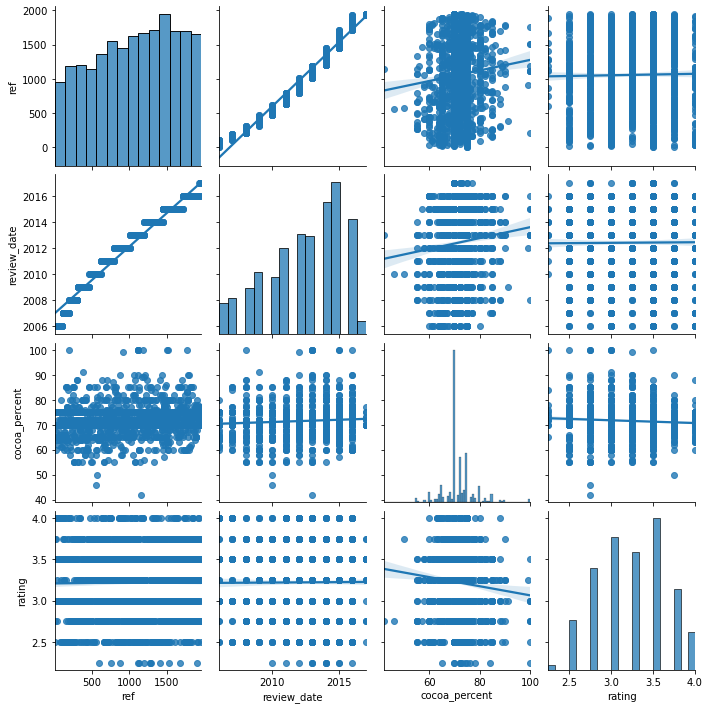

In [38]:
sns.pairplot(cacao, kind = 'reg')


In [39]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [40]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
#                 data=cacao[column].isin(cacao[column].value_counts()[:10]),
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [10]:
cacao.loc[cacao.loc[:, 'company'].isin(cacao.loc[:, 'company'].value_counts().index[:10])]

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1721,1722,,"Los Rios, Rancho Grande 2004/2007",153,2007,90%,U.S.A.,2.00,Forastero (Arriba),Ecuador
1746,1747,,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1747,1748,,"Guasare, Zulia Prov., 2015, batch 124",1912,2016,74%,U.S.A.,3.00,Criollo,Venezuela
1755,1756,,Sambirano,951,2012,70%,U.S.A.,3.25,Trinitario,Madagascar


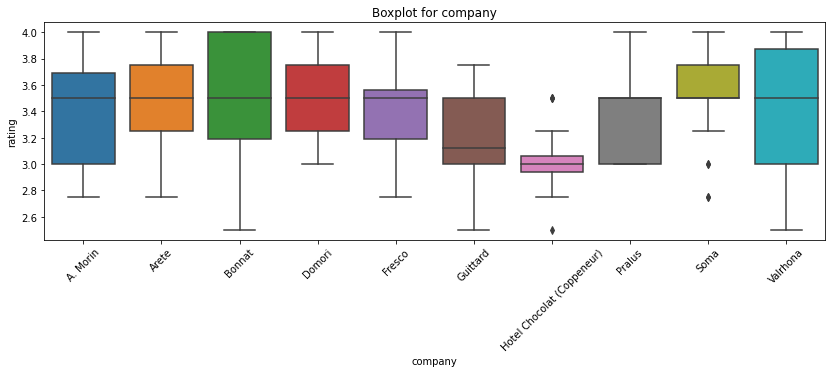

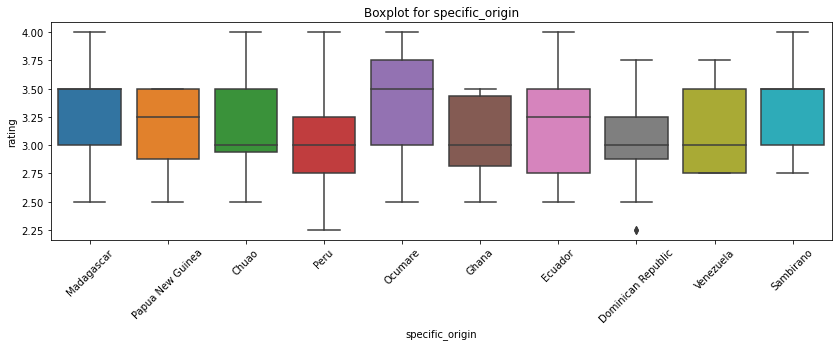

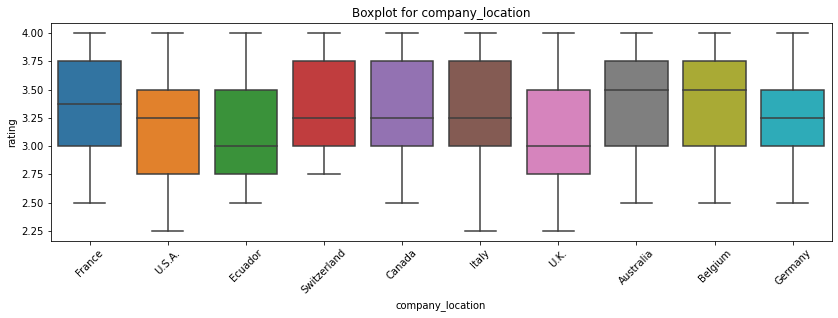

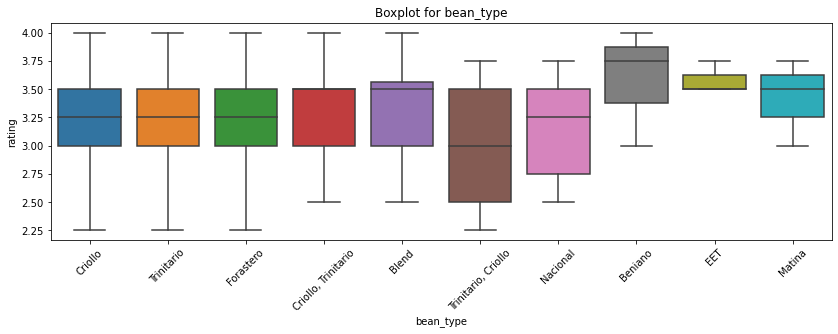

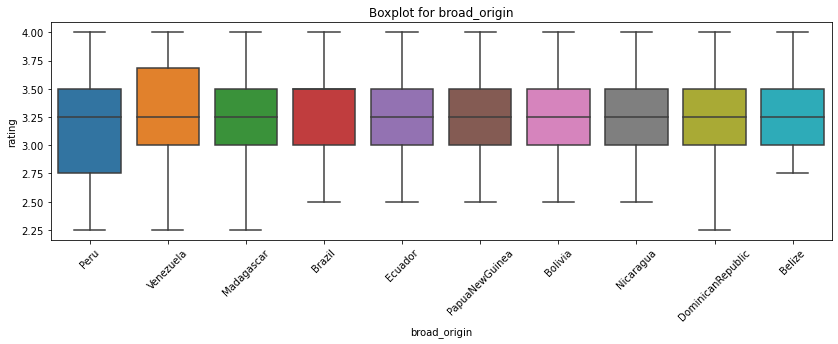

In [41]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

In [68]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column, comb)
            break


In [47]:
cols=cacao.loc[:, 'company'].value_counts().index[:10]

In [92]:
cacao.loc[cacao.loc[:, 'company'] == 'Guittard', 'rating'].std(ddof=0)

0.3313016789410157

In [93]:
from scipy.stats import norm, t
tt = 3.5722222222222224 - 3.1805555555555554
b11 = 0.32754228828852616**2
b12 = b11/45
b21 = 0.3313016789410157**2
b22 = b21/18
bb = pow(b12+b22, 0.5)
my = t.cdf(tt/bb, 45+18-2)
di = 1 - ttest_ind(cacao.loc[cacao.loc[:, 'company'] == 'Soma', 'rating'], cacao.loc[cacao.loc[:, 'company'] == 'Guittard', 'rating']).pvalue
my - di

4.9926386281984314e-05

In [49]:
list(combinations(cols, 2))

[('Soma', 'Bonnat'),
 ('Soma', 'Fresco'),
 ('Soma', 'Pralus'),
 ('Soma', 'Domori'),
 ('Soma', 'Valrhona'),
 ('Soma', 'A. Morin'),
 ('Soma', 'Guittard'),
 ('Soma', 'Arete'),
 ('Soma', 'Hotel Chocolat (Coppeneur)'),
 ('Bonnat', 'Fresco'),
 ('Bonnat', 'Pralus'),
 ('Bonnat', 'Domori'),
 ('Bonnat', 'Valrhona'),
 ('Bonnat', 'A. Morin'),
 ('Bonnat', 'Guittard'),
 ('Bonnat', 'Arete'),
 ('Bonnat', 'Hotel Chocolat (Coppeneur)'),
 ('Fresco', 'Pralus'),
 ('Fresco', 'Domori'),
 ('Fresco', 'Valrhona'),
 ('Fresco', 'A. Morin'),
 ('Fresco', 'Guittard'),
 ('Fresco', 'Arete'),
 ('Fresco', 'Hotel Chocolat (Coppeneur)'),
 ('Pralus', 'Domori'),
 ('Pralus', 'Valrhona'),
 ('Pralus', 'A. Morin'),
 ('Pralus', 'Guittard'),
 ('Pralus', 'Arete'),
 ('Pralus', 'Hotel Chocolat (Coppeneur)'),
 ('Domori', 'Valrhona'),
 ('Domori', 'A. Morin'),
 ('Domori', 'Guittard'),
 ('Domori', 'Arete'),
 ('Domori', 'Hotel Chocolat (Coppeneur)'),
 ('Valrhona', 'A. Morin'),
 ('Valrhona', 'Guittard'),
 ('Valrhona', 'Arete'),
 ('Valrhon

In [69]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)comb[1],

Найдены статистически значимые различия для колонки company ('Soma', 'Guittard')
Найдены статистически значимые различия для колонки specific_origin ('Madagascar', 'Peru')
Найдены статистически значимые различия для колонки company_location ('U.S.A.', 'France')


In [ ]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()